@author: Ariana CARNIELLI

## Tests pour le projet de COMPLEX 2019-2020

Ce notebook réalise des tests à l'aide des fonctions du fichier `fonctionsTests.py`.

Chaque test est réalisé dans deux céllules : une où le test en soi est réalisé et les résultats enregistrés dans un fichier `.npz` et une qui lit les données du fichier correspondant et créé un graphique. Ce découpage permet de re-tracer des graphiques sans re-faire le test.  

In [1]:
from fonctionsTests import *

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#pour enregistrer les figures créées en format pgf avec LaTeX.

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "pgf.preamble": [
         r"\usepackage[utf8x]{inputenc}",
         r"\usepackage[T1]{fontenc}",
         r"\usepackage{cmbright}",
         ]
})

# 3. Méthodes Approchées

### Tests de temps de calcul en fonction de n pour les algorithmes approchés :

La cellule ci-dessous prend plusieurs minutes pour s'executer. Il n'est pas nécessaire de la tourner si le fichier `partie3question2tempsN.npz` existe déjà.

In [ ]:
resGloutonQuart1, _ = testTempsN(500, 0.25, "algoGloutonSansCopies", fois = 100)
resGloutonQuart2, _ = testTempsN(500, 0.50, "algoGloutonSansCopies", fois = 100)
resGloutonQuart3, _ = testTempsN(500, 0.75, "algoGloutonSansCopies", fois = 100)
    
resCouplageQuart1, n = testTempsN(500, 0.25, "algoCouplage", fois = 100)
resCouplageQuart2, _ = testTempsN(500, 0.50, "algoCouplage", fois = 100)
resCouplageQuart3, _ = testTempsN(500, 0.75, "algoCouplage", fois = 100)

#on sauvegarde les résultats pour faciliter le plot 
np.savez("partie3question2tempsN", n = n, resCouplageQuart1 = resCouplageQuart1,
   resCouplageQuart2 = resCouplageQuart2, resCouplageQuart3 = resCouplageQuart3, 
   resGloutonQuart1 = resGloutonQuart1, resGloutonQuart2 = resGloutonQuart2,
   resGloutonQuart3 = resGloutonQuart3)

On crée le graphique à partir des données du fichier `partie3question2tempsN.npz`. 

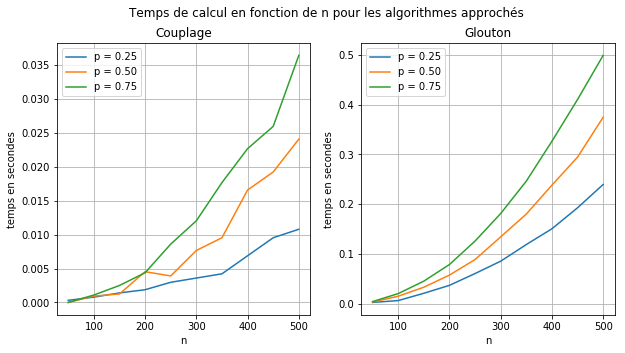

In [3]:
#on peut récuperer les résultats et refaire le plot sans recalculer tout
    
data = np.load("partie3question2tempsN.npz")
n = data["n"]
resCouplageQuart1 = data["resCouplageQuart1"]
resCouplageQuart2 = data["resCouplageQuart2"]
resCouplageQuart3 = data["resCouplageQuart3"]
resGloutonQuart1 = data["resGloutonQuart1"]
resGloutonQuart2 = data["resGloutonQuart2"]
resGloutonQuart3 = data["resGloutonQuart3"]

#on dessine 2 graphes, chacun avec 3 courbes
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(n,resCouplageQuart1, label = "p = 0.25")
ax[0].plot(n,resCouplageQuart2, label = "p = 0.50")
ax[0].plot(n,resCouplageQuart3, label = "p = 0.75")
ax[1].plot(n,resGloutonQuart1, label = "p = 0.25")
ax[1].plot(n,resGloutonQuart2, label = "p = 0.50")
ax[1].plot(n,resGloutonQuart3, label = "p = 0.75")

fig.suptitle("Temps de calcul en fonction de n pour les algorithmes approchés")
ax[0].set_title("Couplage")
ax[1].set_title("Glouton")

for i in range(2):
    ax[i].grid(True)
    ax[i].set_axisbelow(True)
    ax[i].set_xlabel("n")
    ax[i].set_ylabel("temps en secondes")
    ax[i].legend()
plt.show()

fig.savefig("partie3question2tempsN.png")
fig.savefig("partie3question2tempsN.pgf")

### Test de qualité d'approximation des algorithmes :

La cellule ci-dessous prend plusieurs minutes pour s'executer. Il n'est pas nécessaire de la tourner si le fichier `partie3question2qualite.npz` existe déjà.

In [3]:
resGloutonQuart1, _ = testEcart(50, 0.25, "algoGloutonSansCopies", fois = 50)
resGloutonQuart2, _ = testEcart(50, 0.50, "algoGloutonSansCopies", fois = 50)
resGloutonQuart3, _ = testEcart(50, 0.75, "algoGloutonSansCopies", fois = 50)
    
resCouplageQuart1, n = testEcart(50, 0.25, "algoCouplage", fois = 50)
resCouplageQuart2, _ = testEcart(50, 0.50, "algoCouplage", fois = 50)
resCouplageQuart3, _ = testEcart(50, 0.75, "algoCouplage", fois = 50)

#on sauvegarde les résultats pour faciliter le plot 
np.savez("partie3question2qualite", n = n, resCouplageQuart1 = resCouplageQuart1,
   resCouplageQuart2 = resCouplageQuart2, resCouplageQuart3 = resCouplageQuart3, 
   resGloutonQuart1 = resGloutonQuart1, resGloutonQuart2 = resGloutonQuart2,
   resGloutonQuart3 = resGloutonQuart3)

[####################] 100%
[####################] 100%
[####################] 100%
[####################] 100%
[####################] 100%
[####################] 100%


On crée le graphique à partir des données du fichier `partie3question2qualite.npz`. 

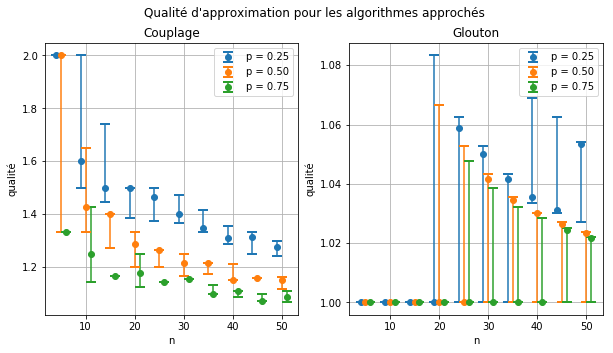

In [4]:
#on peut récuperer les résultats et refaire le plot sans recalculer tout
    
data = np.load("partie3question2qualite.npz")
n = data["n"]
resCouplageQuart1 = data["resCouplageQuart1"]
resCouplageQuart2 = data["resCouplageQuart2"]
resCouplageQuart3 = data["resCouplageQuart3"]
resGloutonQuart1 = data["resGloutonQuart1"]
resGloutonQuart2 = data["resGloutonQuart2"]
resGloutonQuart3 = data["resGloutonQuart3"]

resCouplageQuart1 = (np.quantile(resCouplageQuart1, [0.25, 0.75], axis = 1), 
                     np.median(resCouplageQuart1, axis = 1)) 

resCouplageQuart2 = (np.quantile(resCouplageQuart2, [0.25, 0.75], axis = 1), 
                     np.median(resCouplageQuart2, axis = 1)) 

resCouplageQuart3 = (np.quantile(resCouplageQuart3, [0.25, 0.75], axis = 1), 
                     np.median(resCouplageQuart3, axis = 1)) 

resGloutonQuart1 = (np.quantile(resGloutonQuart1, [0.25, 0.75], axis = 1), 
                    np.median(resGloutonQuart1, axis = 1)) 

resGloutonQuart2 = (np.quantile(resGloutonQuart2, [0.25, 0.75], axis = 1), 
                    np.median(resGloutonQuart2, axis = 1)) 

resGloutonQuart3 = (np.quantile(resGloutonQuart3, [0.25, 0.75], axis = 1), 
                    np.median(resGloutonQuart3, axis = 1)) 

#on dessine 2 graphes, chacun avec 3 courbes
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].errorbar(n - (n.max() / 50), resCouplageQuart1[1], yerr = abs(resCouplageQuart1[0]
               - resCouplageQuart1[1]), label = "p = 0.25", fmt = "o", capsize = 5, capthick = 2)
ax[0].errorbar(n, resCouplageQuart2[1], yerr = abs(resCouplageQuart2[0]
               - resCouplageQuart2[1]), label = "p = 0.50", fmt = "o", capsize = 5, capthick = 2)
ax[0].errorbar(n + (n.max() / 50), resCouplageQuart3[1], yerr = abs(resCouplageQuart3[0]
               - resCouplageQuart3[1]), label = "p = 0.75", fmt = "o", capsize = 5, capthick = 2)

ax[1].errorbar(n - (n.max() / 50), resGloutonQuart1[1], yerr = abs(resGloutonQuart1[0]
               - resGloutonQuart1[1]), label = "p = 0.25", fmt = "o", capsize = 5, capthick = 2)
ax[1].errorbar(n, resGloutonQuart2[1], yerr = abs(resGloutonQuart2[0]
               - resGloutonQuart2[1]), label = "p = 0.50", fmt = "o", capsize = 5, capthick = 2)
ax[1].errorbar(n + (n.max() / 50), resGloutonQuart3[1], yerr = abs(resGloutonQuart3[0]
               - resGloutonQuart3[1]), label = "p = 0.75", fmt = "o", capsize = 5, capthick = 2)

fig.suptitle("Qualité d'approximation pour les algorithmes approchés")
ax[0].set_title("Couplage")
ax[1].set_title("Glouton")

for i in range(2):
    ax[i].grid(True)
    ax[i].set_axisbelow(True)
    ax[i].set_xlabel("n")
    ax[i].set_ylabel("qualité")
    ax[i].legend()
plt.show()

fig.savefig("partie3question2qualite.png")
fig.savefig("partie3question2qualite.pgf")

# 4. Séparation et évaluation

### Tests de temps de calcul en fonction de n pour les algorithmes de branchement :

#### Algorithme de branchement simple

In [4]:
resBranchementQuart1, n = testTempsN(16, 0.25, "algoBranchement", fois = 100)
resBranchementQuart2, _ = testTempsN(16, 0.50, "algoBranchement", fois = 100)
resBranchementQuart3, _ = testTempsN(16, 0.75, "algoBranchement", fois = 100)  
resBranchementSqrt, _ = testTempsPfunc(16, lambda n: 1/np.sqrt(n), 
                                       "algoBranchement", fois = 100)

resBranchement1surN, _ = testTempsPfunc(16, lambda n: 1/n, 
                                       "algoBranchement", fois = 100)

#on sauvegarde les résultats pour faciliter le plot 
np.savez("partie4BranchementTempsN", n = n, resBranchementQuart1 = resBranchementQuart1,
   resBranchementQuart2 = resBranchementQuart2, resBranchementQuart3 = resBranchementQuart3,
   resBranchementSqrt = resBranchementSqrt, resBranchement1surN = resBranchement1surN)

[####################] 100%
[####################] 100%
[####################] 100%
[####################] 100%
[####################] 100%


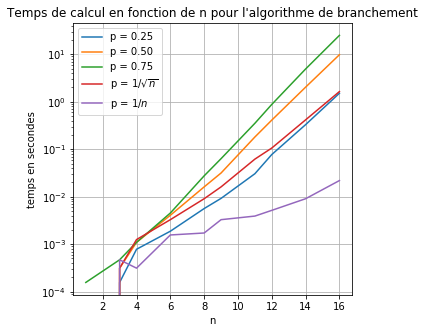

In [6]:
#on peut récuperer les résultats et refaire le plot sans recalculer tout
    
data = np.load("partie4BranchementTempsN.npz")
n = data["n"]
resBranchementQuart1 = data["resBranchementQuart1"]
resBranchementQuart2 = data["resBranchementQuart2"]
resBranchementQuart3 = data["resBranchementQuart3"]
resBranchementSqrt = data["resBranchementSqrt"]
resBranchement1surN = data["resBranchement1surN"]

#on dessine 2 graphes, chacun avec 3 courbes
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(n,resBranchementQuart1, label = "p = 0.25")
ax.plot(n,resBranchementQuart2, label = "p = 0.50")
ax.plot(n,resBranchementQuart3, label = "p = 0.75")
ax.plot(n,resBranchementSqrt, label = "p = $1/\\sqrt{n}$")
ax.plot(n,resBranchement1surN, label = "p = $1/n$")

ax.set_yscale("log")
ax.set_title("Temps de calcul en fonction de n pour l'algorithme de branchement")

ax.grid(True)
ax.set_axisbelow(True)
ax.set_xlabel("n")
ax.set_ylabel("temps en secondes")
ax.legend()
plt.show()

fig.savefig("partie4BranchementTempsN.png")
fig.savefig("partie4BranchementTempsN.pgf")

#### Algorithme de branchement avec bornes min et max et élagage

In [8]:
resBranchementBorne00Quart1, n = testTempsN(18, 0.25, "algoBranchementBorne", fois = 100,
                                          methodeMax = 0, methodeMin = 0)
resBranchementBorne00Quart2, _ = testTempsN(18, 0.50, "algoBranchementBorne", fois = 100,
                                          methodeMax = 0, methodeMin = 0)
resBranchementBorne00Quart3, _ = testTempsN(18, 0.75, "algoBranchementBorne", fois = 100,
                                          methodeMax = 0, methodeMin = 0)
resBranchementBorne00Sqrt, _ = testTempsPfunc(18, lambda n: 1/np.sqrt(n), 
                                            "algoBranchementBorne", fois = 100,
                                            methodeMax = 0, methodeMin = 0)
resBranchementBorne001surN, _ = testTempsPfunc(18, lambda n: 1/n, 
                                             "algoBranchementBorne", fois = 100,
                                             methodeMax = 0, methodeMin = 0)

#on sauvegarde les résultats pour faciliter le plot 
np.savez("partie4BranchementBorne00TempsN", n = n,
         resBranchementBorne00Quart1 = resBranchementBorne00Quart1,
         resBranchementBorne00Quart2 = resBranchementBorne00Quart2,
         resBranchementBorne00Quart3 = resBranchementBorne00Quart3,
         resBranchementBorne00Sqrt = resBranchementBorne00Sqrt,
         resBranchementBorne001surN = resBranchementBorne001surN)

[####################] 100%
[####################] 100%
[####################] 100%
[####################] 100%
[####################] 100%


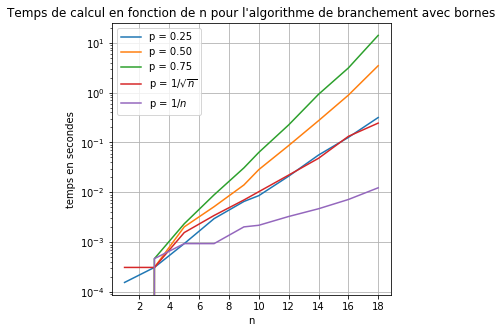

In [11]:
#on peut récuperer les résultats et refaire le plot sans recalculer tout
    
data = np.load("partie4BranchementBorne00TempsN.npz")
n = data["n"]
resBranchementBorne00Quart1 = data["resBranchementBorne00Quart1"]
resBranchementBorne00Quart2 = data["resBranchementBorne00Quart2"]
resBranchementBorne00Quart3 = data["resBranchementBorne00Quart3"]
resBranchementBorne00Sqrt = data["resBranchementBorne00Sqrt"]
resBranchementBorne001surN = data["resBranchementBorne001surN"]

#on dessine 2 graphes, chacun avec 3 courbes
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(n,resBranchementBorne00Quart1, label = "p = 0.25")
ax.plot(n,resBranchementBorne00Quart2, label = "p = 0.50")
ax.plot(n,resBranchementBorne00Quart3, label = "p = 0.75")
ax.plot(n,resBranchementBorne00Sqrt, label = "p = $1/\\sqrt{n}$")
ax.plot(n,resBranchementBorne001surN, label = "p = $1/n$")

ax.set_yscale("log")
ax.set_xticks(range(2, 19, 2))
ax.set_title("Temps de calcul en fonction de n pour l'algorithme de branchement avec bornes")

ax.grid(True)
ax.set_axisbelow(True)
ax.set_xlabel("n")
ax.set_ylabel("temps en secondes")
ax.legend()
plt.show()

fig.savefig("partie4BranchementBorne00TempsN.png")
fig.savefig("partie4BranchementBorne00TempsN.pgf")

In [31]:
data = np.load("partie4BranchementBorne00TempsN.npz")
n = data["n"]
resBranchementBorne00 = data["resBranchementBorne00Quart1"]
#resBranchementBorne01, _ = testTempsN(20, 0.25, "algoBranchementBorne", fois = 100,
#                                      methodeMax = 0, methodeMin = 1)
#resBranchementBorne02, _ = testTempsN(20, 0.25, "algoBranchementBorne", fois = 100,
#                                      methodeMax = 0, methodeMin = 2)
#resBranchementBorne10, _ = testTempsN(20, 0.25, "algoBranchementBorne", fois = 100,
#                                      methodeMax = 1, methodeMin = 0)
resBranchementBorne11, _ = testTempsN(20, 0.25, "algoBranchementBorne", fois = 100,
                                      methodeMax = 1, methodeMin = 1)
#resBranchementBorne12, _ = testTempsN(20, 0.25, "algoBranchementBorne", fois = 100,
#                                      methodeMax = 1, methodeMin = 2)
#resBranchementBorne20, _ = testTempsN(20, 0.25, "algoBranchementBorne", fois = 100,
#                                      methodeMax = 2, methodeMin = 0)
#resBranchementBorne21, _ = testTempsN(20, 0.25, "algoBranchementBorne", fois = 100,
#                                      methodeMax = 2, methodeMin = 1)
#resBranchementBorne22, _ = testTempsN(20, 0.25, "algoBranchementBorne", fois = 100,
#                                      methodeMax = 2, methodeMin = 2)

#on sauvegarde les résultats pour faciliter le plot 
np.savez("partie4BranchementBornesTempsN", n = n,
         resBranchementBorne00 = resBranchementBorne00,
         resBranchementBorne01 = resBranchementBorne01,
         resBranchementBorne02 = resBranchementBorne02,
         resBranchementBorne10 = resBranchementBorne10,
         resBranchementBorne11 = resBranchementBorne11,
         resBranchementBorne12 = resBranchementBorne12,
         resBranchementBorne20 = resBranchementBorne20,
         resBranchementBorne21 = resBranchementBorne21,
         resBranchementBorne22 = resBranchementBorne22)

[####################] 100%


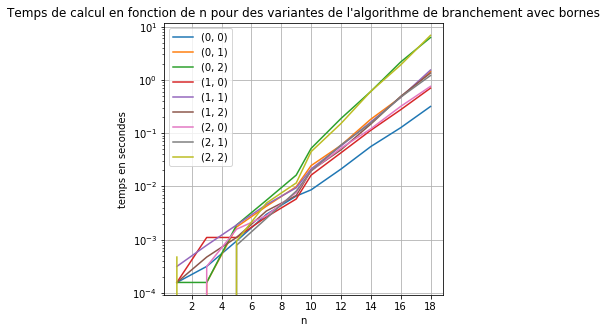

In [32]:
#on peut récuperer les résultats et refaire le plot sans recalculer tout
    
data = np.load("partie4BranchementBornesTempsN.npz")
n = data["n"]
resBranchementBorne00 = data["resBranchementBorne00"]
resBranchementBorne01 = data["resBranchementBorne01"]
resBranchementBorne02 = data["resBranchementBorne02"]
resBranchementBorne10 = data["resBranchementBorne10"]
resBranchementBorne11 = data["resBranchementBorne11"]
resBranchementBorne12 = data["resBranchementBorne12"]
resBranchementBorne20 = data["resBranchementBorne20"]
resBranchementBorne21 = data["resBranchementBorne21"]
resBranchementBorne22 = data["resBranchementBorne22"]

#on dessine 2 graphes, chacun avec 3 courbes
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(n,resBranchementBorne00, label = "(0, 0)")
ax.plot(n,resBranchementBorne01, label = "(0, 1)")
ax.plot(n,resBranchementBorne02, label = "(0, 2)")
ax.plot(n,resBranchementBorne10, label = "(1, 0)")
ax.plot(n,resBranchementBorne11, label = "(1, 1)")
ax.plot(n,resBranchementBorne12, label = "(1, 2)")
ax.plot(n,resBranchementBorne20, label = "(2, 0)")
ax.plot(n,resBranchementBorne21, label = "(2, 1)")
ax.plot(n,resBranchementBorne22, label = "(2, 2)")

ax.set_yscale("log")
ax.set_xticks(range(2, 19, 2))
ax.set_title("Temps de calcul en fonction de n pour des variantes de l'algorithme de branchement avec bornes")

ax.grid(True)
ax.set_axisbelow(True)
ax.set_xlabel("n")
ax.set_ylabel("temps en secondes")
ax.legend()
plt.show()

fig.savefig("partie4BranchementBornesTempsN.png")
fig.savefig("partie4BranchementBornesTempsN.pgf")

#### Algorithme de branchement amélioré

##### Première version : sommetMax = False, elimDegre1 = False

In [20]:
resBranchementAmelioreFFQuart1, n = testTempsN(30, 0.25, "algoBranchementAmeliore", fois = 100,
                                          sommetMax = False, elimDegre1 = False)
resBranchementAmelioreFFQuart2, _ = testTempsN(30, 0.50, "algoBranchementAmeliore", fois = 100,
                                          sommetMax = False, elimDegre1 = False)
resBranchementAmelioreFFQuart3, _ = testTempsN(30, 0.75, "algoBranchementAmeliore", fois = 100,
                                          sommetMax = False, elimDegre1 = False)
resBranchementAmelioreFFSqrt, _ = testTempsPfunc(30, lambda n: 1/np.sqrt(n), 
                                            "algoBranchementAmeliore", fois = 100,
                                            sommetMax = False, elimDegre1 = False)
resBranchementAmelioreFF1surN, _ = testTempsPfunc(30, lambda n: 1/n, 
                                             "algoBranchementAmeliore", fois = 100,
                                             sommetMax = False, elimDegre1 = False)

#on sauvegarde les résultats pour faciliter le plot 
np.savez("partie4BranchementAmelioreFFTempsN", n = n,
         resBranchementAmelioreFFQuart1 = resBranchementAmelioreFFQuart1,
         resBranchementAmelioreFFQuart2 = resBranchementAmelioreFFQuart2,
         resBranchementAmelioreFFQuart3 = resBranchementAmelioreFFQuart3,
         resBranchementAmelioreFFSqrt = resBranchementAmelioreFFSqrt,
         resBranchementAmelioreFF1surN = resBranchementAmelioreFF1surN)

[####################] 100%
[####################] 100%
[####################] 100%
[####################] 100%
[####################] 100%


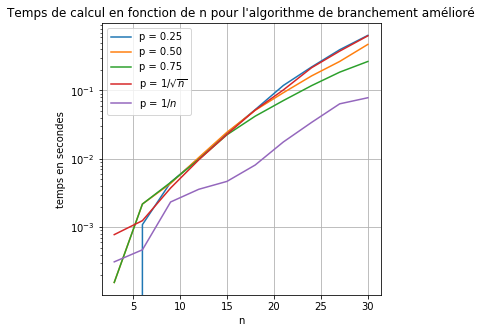

In [23]:
#on peut récuperer les résultats et refaire le plot sans recalculer tout
    
data = np.load("partie4BranchementAmelioreFFTempsN.npz")
n = data["n"]
resBranchementAmelioreFFQuart1 = data["resBranchementAmelioreFFQuart1"]
resBranchementAmelioreFFQuart2 = data["resBranchementAmelioreFFQuart2"]
resBranchementAmelioreFFQuart3 = data["resBranchementAmelioreFFQuart3"]
resBranchementAmelioreFFSqrt = data["resBranchementAmelioreFFSqrt"]
resBranchementAmelioreFF1surN = data["resBranchementAmelioreFF1surN"]

#on dessine 2 graphes, chacun avec 3 courbes
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(n,resBranchementAmelioreFFQuart1, label = "p = 0.25")
ax.plot(n,resBranchementAmelioreFFQuart2, label = "p = 0.50")
ax.plot(n,resBranchementAmelioreFFQuart3, label = "p = 0.75")
ax.plot(n,resBranchementAmelioreFFSqrt, label = "p = $1/\\sqrt{n}$")
ax.plot(n,resBranchementAmelioreFF1surN, label = "p = $1/n$")

ax.set_yscale("log")
ax.set_title("Temps de calcul en fonction de n pour l'algorithme de branchement amélioré")

ax.grid(True)
ax.set_axisbelow(True)
ax.set_xlabel("n")
ax.set_ylabel("temps en secondes")
ax.legend()
plt.show()

fig.savefig("partie4BranchementAmelioreFFTempsN.png")
fig.savefig("partie4BranchementAmelioreFFTempsN.pgf")

##### Deuxième version : sommetMax = True, elimDegre1 = False

In [24]:
resBranchementAmelioreVFQuart1, n = testTempsN(30, 0.25, "algoBranchementAmeliore", fois = 100,
                                          sommetMax = True, elimDegre1 = False)
resBranchementAmelioreVFQuart2, _ = testTempsN(30, 0.50, "algoBranchementAmeliore", fois = 100,
                                          sommetMax = True, elimDegre1 = False)
resBranchementAmelioreVFQuart3, _ = testTempsN(30, 0.75, "algoBranchementAmeliore", fois = 100,
                                          sommetMax = True, elimDegre1 = False)
resBranchementAmelioreVFSqrt, _ = testTempsPfunc(30, lambda n: 1/np.sqrt(n), 
                                            "algoBranchementAmeliore", fois = 100,
                                            sommetMax = True, elimDegre1 = False)
resBranchementAmelioreVF1surN, _ = testTempsPfunc(30, lambda n: 1/n, 
                                             "algoBranchementAmeliore", fois = 100,
                                             sommetMax = True, elimDegre1 = False)

#on sauvegarde les résultats pour faciliter le plot 
np.savez("partie4BranchementAmelioreVFTempsN", n = n,
         resBranchementAmelioreVFQuart1 = resBranchementAmelioreVFQuart1,
         resBranchementAmelioreVFQuart2 = resBranchementAmelioreVFQuart2,
         resBranchementAmelioreVFQuart3 = resBranchementAmelioreVFQuart3,
         resBranchementAmelioreVFSqrt = resBranchementAmelioreVFSqrt,
         resBranchementAmelioreVF1surN = resBranchementAmelioreVF1surN)

[####################] 100%
[####################] 100%
[####################] 100%
[####################] 100%
[####################] 100%


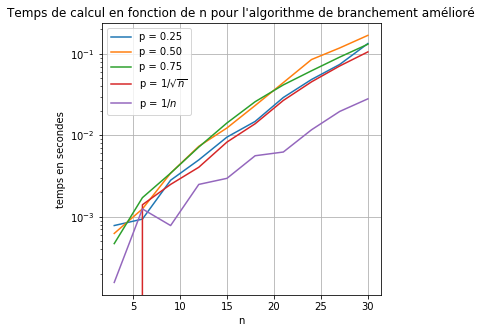

In [25]:
#on peut récuperer les résultats et refaire le plot sans recalculer tout
    
data = np.load("partie4BranchementAmelioreVFTempsN.npz")
n = data["n"]
resBranchementAmelioreVFQuart1 = data["resBranchementAmelioreVFQuart1"]
resBranchementAmelioreVFQuart2 = data["resBranchementAmelioreVFQuart2"]
resBranchementAmelioreVFQuart3 = data["resBranchementAmelioreVFQuart3"]
resBranchementAmelioreVFSqrt = data["resBranchementAmelioreVFSqrt"]
resBranchementAmelioreVF1surN = data["resBranchementAmelioreVF1surN"]

#on dessine 2 graphes, chacun avec 3 courbes
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(n,resBranchementAmelioreVFQuart1, label = "p = 0.25")
ax.plot(n,resBranchementAmelioreVFQuart2, label = "p = 0.50")
ax.plot(n,resBranchementAmelioreVFQuart3, label = "p = 0.75")
ax.plot(n,resBranchementAmelioreVFSqrt, label = "p = $1/\\sqrt{n}$")
ax.plot(n,resBranchementAmelioreVF1surN, label = "p = $1/n$")
ax.set_yscale("log")
ax.set_title("Temps de calcul en fonction de n pour l'algorithme de branchement amélioré")

ax.grid(True)
ax.set_axisbelow(True)
ax.set_xlabel("n")
ax.set_ylabel("temps en secondes")
ax.legend()
plt.show()

fig.savefig("partie4BranchementAmelioreVFTempsN.png")
fig.savefig("partie4BranchementAmelioreVFTempsN.pgf")

##### Troisième version : sommetMax = True, elimDegre1 = True

In [26]:
resBranchementAmelioreVVQuart1, n = testTempsN(30, 0.25, "algoBranchementAmeliore", fois = 100,
                                          sommetMax = True, elimDegre1 = True)
resBranchementAmelioreVVQuart2, _ = testTempsN(30, 0.50, "algoBranchementAmeliore", fois = 100,
                                          sommetMax = True, elimDegre1 = True)
resBranchementAmelioreVVQuart3, _ = testTempsN(30, 0.75, "algoBranchementAmeliore", fois = 100,
                                          sommetMax = True, elimDegre1 = True)
resBranchementAmelioreVVSqrt, _ = testTempsPfunc(30, lambda n: 1/np.sqrt(n), 
                                            "algoBranchementAmeliore", fois = 100,
                                            sommetMax = True, elimDegre1 = True)
resBranchementAmelioreVV1surN, _ = testTempsPfunc(30, lambda n: 1/n, 
                                             "algoBranchementAmeliore", fois = 100,
                                             sommetMax = True, elimDegre1 = True)

#on sauvegarde les résultats pour faciliter le plot 
np.savez("partie4BranchementAmelioreVVTempsN", n = n,
         resBranchementAmelioreVVQuart1 = resBranchementAmelioreVVQuart1,
         resBranchementAmelioreVVQuart2 = resBranchementAmelioreVVQuart2,
         resBranchementAmelioreVVQuart3 = resBranchementAmelioreVVQuart3,
         resBranchementAmelioreVVSqrt = resBranchementAmelioreVVSqrt,
         resBranchementAmelioreVV1surN = resBranchementAmelioreVV1surN)

[####################] 100%
[####################] 100%
[####################] 100%
[####################] 100%
[####################] 100%


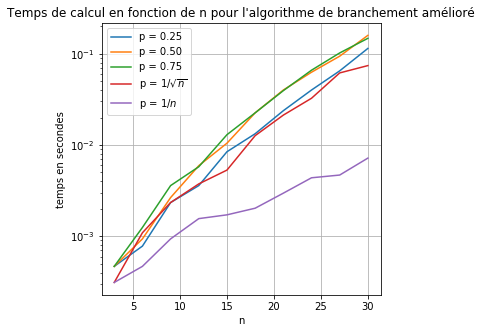

In [27]:
#on peut récuperer les résultats et refaire le plot sans recalculer tout
    
data = np.load("partie4BranchementAmelioreVVTempsN.npz")
n = data["n"]
resBranchementAmelioreVVQuart1 = data["resBranchementAmelioreVVQuart1"]
resBranchementAmelioreVVQuart2 = data["resBranchementAmelioreVVQuart2"]
resBranchementAmelioreVVQuart3 = data["resBranchementAmelioreVVQuart3"]
resBranchementAmelioreVVSqrt = data["resBranchementAmelioreVVSqrt"]
resBranchementAmelioreVV1surN = data["resBranchementAmelioreVV1surN"]

#on dessine 2 graphes, chacun avec 3 courbes
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(n,resBranchementAmelioreVVQuart1, label = "p = 0.25")
ax.plot(n,resBranchementAmelioreVVQuart2, label = "p = 0.50")
ax.plot(n,resBranchementAmelioreVVQuart3, label = "p = 0.75")
ax.plot(n,resBranchementAmelioreVVSqrt, label = "p = $1/\\sqrt{n}$")
ax.plot(n,resBranchementAmelioreVV1surN, label = "p = $1/n$")

ax.set_yscale("log")
ax.set_title("Temps de calcul en fonction de n pour l'algorithme de branchement amélioré")

ax.grid(True)
ax.set_axisbelow(True)
ax.set_xlabel("n")
ax.set_ylabel("temps en secondes")
ax.legend()
plt.show()

fig.savefig("partie4BranchementAmelioreVVTempsN.png")
fig.savefig("partie4BranchementAmelioreVVTempsN.pgf")

#### Comparaison de la quantité de nœuds visités dans l'arbre

In [35]:
listAlgo = [("algoBranchement", {}),
            ("algoBranchementBorne", {"methodeMax": 0, "methodeMin": 0}),
            ("algoBranchementBorne", {"methodeMax": 0, "methodeMin": 1}),
            ("algoBranchementBorne", {"methodeMax": 0, "methodeMin": 2}),
            ("algoBranchementBorne", {"methodeMax": 1, "methodeMin": 0}),
            ("algoBranchementBorne", {"methodeMax": 1, "methodeMin": 1}),
            ("algoBranchementBorne", {"methodeMax": 1, "methodeMin": 2}),
            ("algoBranchementBorne", {"methodeMax": 2, "methodeMin": 0}),
            ("algoBranchementBorne", {"methodeMax": 2, "methodeMin": 1}),
            ("algoBranchementBorne", {"methodeMax": 2, "methodeMin": 2}),
            ("algoBranchementAmeliore", {"sommetMax": False, "elimDegre1": False}),
            ("algoBranchementAmeliore", {"sommetMax": True,  "elimDegre1": False}),
            ("algoBranchementAmeliore", {"sommetMax": True,  "elimDegre1": True})]
n = np.array([16,   16,  16])
p = np.array([0.25, 0.5, 0.75])

resNoeuds = testNoeud(n, p, listAlgo)

#on sauvegarde les résultats pour faciliter le plot 
np.savez("resNoeuds", n = n, p = p, resNoeuds = resNoeuds)

[####################] 100%


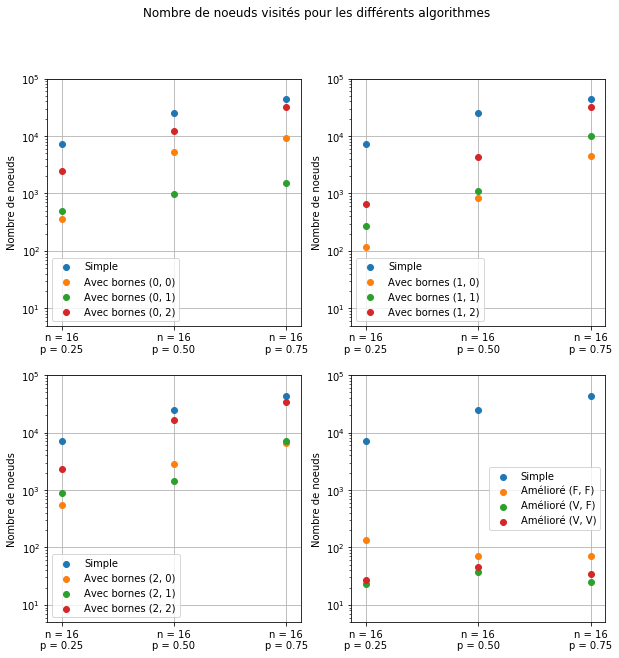

In [36]:
#on peut récuperer les résultats et refaire le plot sans recalculer tout
    
data = np.load("resNoeuds.npz")
n = data["n"]
p = data["p"]
resNoeuds = data["resNoeuds"]

#on dessine 2 graphes, chacun avec 3 courbes
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

listNoms = ["Simple"] + \
           ["Avec bornes ({}, {})".format(i, j) for i in range(3) for j in range(3)] + \
           ["Amélioré ({}, {})".format(i, j) for i, j in [("F", "F"), ("V", "F"), ("V", "V")]]

listAlgo = [("algoBranchement", {}),
            ("algoBranchementBorne", {"methodeMax": 0, "methodeMin": 0}),
            ("algoBranchementBorne", {"methodeMax": 0, "methodeMin": 1}),
            ("algoBranchementBorne", {"methodeMax": 0, "methodeMin": 2}),
            ("algoBranchementBorne", {"methodeMax": 1, "methodeMin": 0}),
            ("algoBranchementBorne", {"methodeMax": 1, "methodeMin": 1}),
            ("algoBranchementBorne", {"methodeMax": 1, "methodeMin": 2}),
            ("algoBranchementBorne", {"methodeMax": 2, "methodeMin": 0}),
            ("algoBranchementBorne", {"methodeMax": 2, "methodeMin": 1}),
            ("algoBranchementBorne", {"methodeMax": 2, "methodeMin": 2}),
            ("algoBranchementAmeliore", {"sommetMax": False, "elimDegre1": False}),
            ("algoBranchementAmeliore", {"sommetMax": True,  "elimDegre1": False}),
            ("algoBranchementAmeliore", {"sommetMax": True,  "elimDegre1": True})]
        
for i in range(2):
    for j in range(2):
        ax[i, j].scatter(range(n.size), resNoeuds[0, :], label="Simple")
ax[0, 0].scatter(range(n.size), resNoeuds[1, :], label="Avec bornes (0, 0)")
ax[0, 0].scatter(range(n.size), resNoeuds[2, :], label="Avec bornes (0, 1)")
ax[0, 0].scatter(range(n.size), resNoeuds[3, :], label="Avec bornes (0, 2)")

ax[0, 1].scatter(range(n.size), resNoeuds[4, :], label="Avec bornes (1, 0)")
ax[0, 1].scatter(range(n.size), resNoeuds[5, :], label="Avec bornes (1, 1)")
ax[0, 1].scatter(range(n.size), resNoeuds[6, :], label="Avec bornes (1, 2)")

ax[1, 0].scatter(range(n.size), resNoeuds[7, :], label="Avec bornes (2, 0)")
ax[1, 0].scatter(range(n.size), resNoeuds[8, :], label="Avec bornes (2, 1)")
ax[1, 0].scatter(range(n.size), resNoeuds[9, :], label="Avec bornes (2, 2)")

ax[1, 1].scatter(range(n.size), resNoeuds[10, :], label="Amélioré (F, F)")
ax[1, 1].scatter(range(n.size), resNoeuds[11, :], label="Amélioré (V, F)")
ax[1, 1].scatter(range(n.size), resNoeuds[12, :], label="Amélioré (V, V)")

fig.suptitle("Nombre de noeuds visités pour les différents algorithmes")
for i in range(2):
    for j in range(2):
        ax[i, j].grid(True)
        ax[i, j].set_axisbelow(True)
        ax[i, j].set_yscale("log")
        #box = ax.get_position()
        #ax.set_position([box.x0, box.y0, box.width*0.5, box.height])
        ax[i, j].set_ylabel("Nombre de noeuds")
        #ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
        ax[i, j].legend()
        ax[i, j].set_ylim([5, 1e5])
        ax[i, j].set_xticks(range(n.size))
        ax[i, j].set_xticklabels(["n = {:d}\np = {:.2f}".format(ni, pi) for ni, pi in zip(n, p)])
plt.show()

fig.savefig("resNoeuds.png")
fig.savefig("resNoeuds.pgf")